In [1]:
import os
from extractInfo import * 
from XYZdihedral import * 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy
from scipy import optimize
import pandas as pd
import shutil
# @hidden_cell

In [2]:
dirs = [x for x in os.listdir(".") if not x.__contains__(".")]
print(dirs)

['2SO_1_e4_D_PHI', '2SO_1_e4_D_PSI', '__pycache__', 'D_1a_4a_L_PHI', 'D_1a_4a_L_PSI', 'D_1a_4e_D_PHI', 'D_1a_4e_D_PSI', 'D_a1-4_2SO_PHI', 'D_a1-4_2SO_PSI', 'L_a1-e4_D_PHI', 'L_a1-e4_D_PSI']


In [3]:
# d = []
# data = {}
# duhhh = open("torsion_energy_name.csv", "w")

# for directory in dirs:
#     print(directory)
#     data[directory] = {}
#     for file in os.listdir(directory):
        
#         if file.__contains__(".out"):
#             print(file)

#             try:
#                 out = ExtractGaussInfo(directory+"/"+file)
#                 out.makeXYZ()
#                 out = ExtractGaussInfo(directory+"/"+file)
#                 duhhh.write("{},{},{}\n".format(file, (out.getEnergy()), (out.getDihedral())))
#                 d.append(out.getEnergy())
#                 data[directory][out.getDihedral()] = out.getEnergy()
#                 print("failed")
#             except:
#                 pass

        
# print(len(d))
# print(data)

In [4]:
# for titles in data.keys():
#     if titles.__contains__("PHI") or titles.__contains__("PSI"):
#         x = []
#         y = []
#         keys = list(data[titles].keys())
#         keys.sort()
#         for k in keys:
#             x.append(k+180)
#             y.append(data[titles][k]*627.51)


#         axes = plt.gca()
#         axes.set_xlim([0,361])
#         plt.xticks(np.arange(0, 361, step=15), rotation=45)

#         y = [value - min(y) for value in y]    
#         axes.set_ylim([-1, max(y)+1])
        
#         newfile = open(titles+".csv", "w")
#         newfile.write("x,y\n")
#         print(x)
#         print(y)
#         for n in range(len(x)):
#             newfile.write("{},{}\n".format(x[n], y[n]))
#             print("{},{}\n".format(x[n], y[n]))
        
        
#         plt.scatter(x, y)
#         plt.title(titles)
#         plt.show()
    

2SO_1_e4_D_PHI.csv


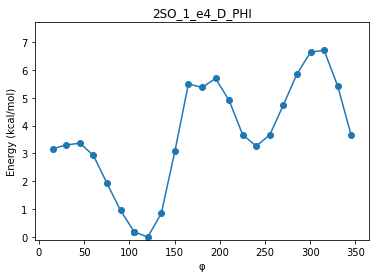

2SO_1_e4_D_PSI.csv


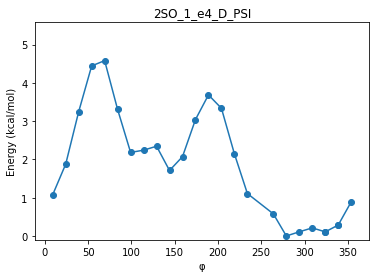

D_1a_4a_L_PHI.csv


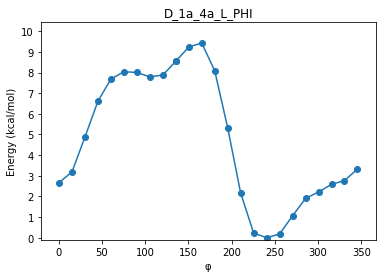

D_1a_4a_L_PSI.csv


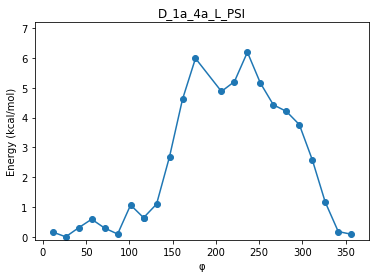

D_1a_4e_D_PHI.csv


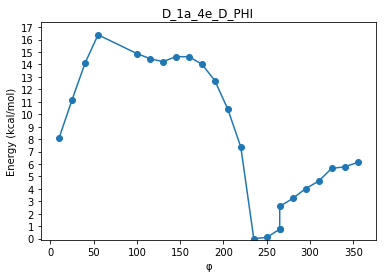

D_1a_4e_D_PSI.csv


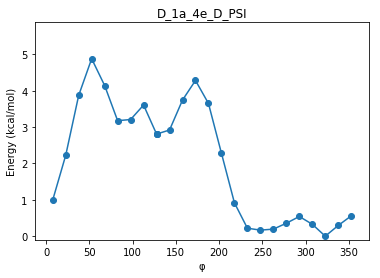

D_a1-4_2SO_PHI.csv


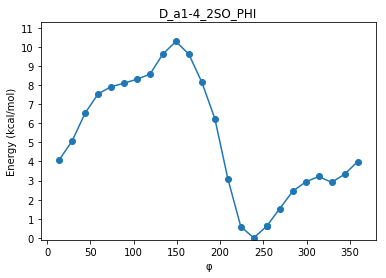

D_a1-4_2SO_PSI.csv


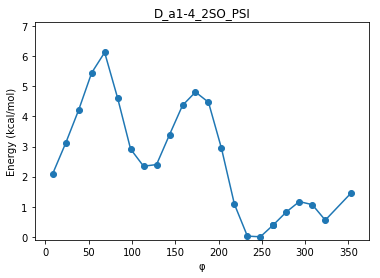

L_a1-e4_D_PHI.csv


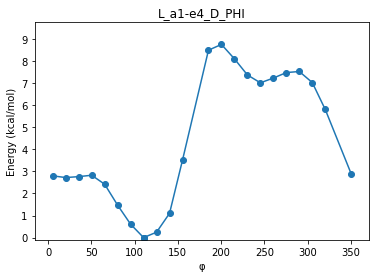

L_a1-e4_D_PSI.csv


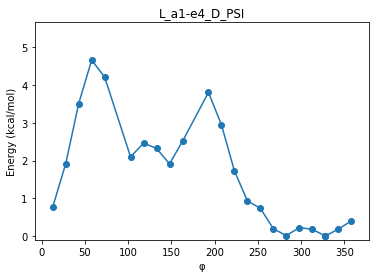

In [5]:
for csv in os.listdir("."):
    x = []
    y = []
    if (csv.__contains__("PHI") or csv.__contains__("PSI")) and csv.__contains__(".csv"):
        print(csv)
        f = open(csv, "r")
        for line in f.readlines()[1:]:
            split = line.split(",")
            if len(split) > 1:
                x.append(float(split[0].strip("\n")))
                y.append(float(split[1].strip("\n")))
                
        
        axes = plt.gca()
        axes.set_ylim([-0.1, max(y)+1])
        
#         axes.axvspan(90, 135, alpha=0.2, color='green')
#         axes.axvspan(220, 260, alpha=0.2, color='green')
        
        axes.set_yticks(np.arange(0,max(y)+1,1)) 
        plt.plot(x, y)
        #plt.axhline(0, color='k')
        plt.scatter(x, y) 
        plt.xlabel("φ")
        plt.ylabel("Energy (kcal/mol)")
        #plt.grid(True)
        #plt.grid(which='major', axis='both', linestyle='-')
        

        plt.title(csv[:-4])
        
        plt.savefig(csv[:-4]+".pdf", transparent=True)
        
        plt.show()
                

In [170]:
def gaussian(x, height, center, width, offset):
    return height*np.exp(-(x - center)**2/(width)) + offset

def six_gaussians(x, h1, c1, w1, 
        h2, c2, w2, 
        h3, c3, w3,
        h4, c4, w4,
        h5, c5, w5,
        h6, c6, w6,
        offset):
    return (gaussian(x, h1, c1, w1, offset=0) +
        gaussian(x, h2, c2, w2, offset=0) +
        gaussian(x, h3, c3, w3, offset=0) + 
        gaussian(x, h4, c4, w4, offset=0) + 
        gaussian(x, h5, c5, w5, offset=0) + 
        gaussian(x, h6, c6, w6, offset=0) + offset)

def fit_the_curve(filename, parameters):
    
    data = pd.read_csv(filename, sep=",", header=None)
    data=data.as_matrix()

    errfunc6 = lambda p, x, y: (six_gaussians(x, *p) - y)**2

    guess6= parameters 
    

    #optim6, success = optimize.curve_fit(six_gaussians, data[:,0], data[:,1], p0=guess6)
    optim6, success = optimize.leastsq(errfunc6, guess6[:], args=(data[:,0], data[:,1]))
    
    ms = 0
    for x, y in zip(data[:,0], data[:,1]):
        ms += (y - six_gaussians(x, *optim6))**2
    ms = ms/len(data[:,0])
    rmsd = numpy.sqrt(ms)
        
    pronumerals = ["a", "b", "c", "d", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "v"]

    for x in range(len(optim6)):
        print("{} = {}".format(pronumerals[x], optim6[x]))

    plt.scatter(data[:,0], data[:,1], c='k', label='measurement', marker='.', edgecolors=None)

    plt.plot(range(0, 360, 1), six_gaussians(range(0, 360, 1), *optim6),
        c='k', label='f(x) RMSD = {:.3f}'.format(rmsd))
    

    print()
    print("RMSD = {}".format(rmsd))
    print()
    

    plt.title("{0}\n{1}".format(filename, "RMSD = {:.3f}".format(rmsd) ))
    plt.ylabel("Energy (kcal/mol)")
    plt.xlabel("Torsion")
    plt.legend(loc='best')
    plt.savefig('fitted_{}.pdf'.format(filename))
    
    plt.show()
    
    print(str(optim6).replace(" ", ","))
    
    return optim6, rmsd


/Volumes/Eric/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Volumes/Eric/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in square
/Volumes/Eric/anaconda3/envs/myenv/lib/python3.6/site-packages/scipy/optimize/minpack.py:436: RuntimeWarning: Number of calls to function has reached maxfev = 4000.
  warnings.warn(errors[info][0], RuntimeWarning)


a = 13.337003852917835
b = 31.37747656707794
c = 16552.668863044142
d = 1.317045173100544
f = 135.64989910074203
g = 391.0353357012606
h = 2.846331099349805
i = 160.74216067911843
j = 226.03674993871442
k = 0.5914581420207863
l = 314.4487031236044
m = 328.40578025859713
n = 8.890004597275063
o = 189.84285752252455
p = 1773.6482827948737
q = 16.08380071222153
r = 305.3791442065091
s = 8985.154648616146
t = -9.902819204906347

RMSD = 0.05790634094973084



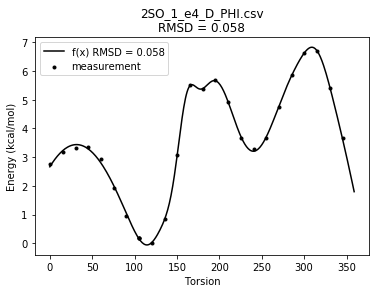

[,1.33370039e+01,,3.13774766e+01,,1.65526689e+04,,1.31704517e+00
,,1.35649899e+02,,3.91035336e+02,,2.84633110e+00,,1.60742161e+02
,,2.26036750e+02,,5.91458142e-01,,3.14448703e+02,,3.28405780e+02
,,8.89000460e+00,,1.89842858e+02,,1.77364828e+03,,1.60838007e+01
,,3.05379144e+02,,8.98515465e+03,-9.90281920e+00]


In [171]:
data = '2SO_1_e4_D_PHI.csv'
guess = [4.57286, 61.5622, 1667.35, 1.83192, 125.896, 368.627, 3.71105, 190.337, 1476.16, 0.454284, 256.292, 445.417, 0.19777, 308.199, 224.193, 1.87345, 378.913, 838.579, 0]
six_optimised_values, rmsd = fit_the_curve(data, guess)

/Volumes/Eric/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


a = 30.728199686020407
b = 305.06983929589205
c = 556.1184556803167
d = -31.32543428075229
f = 305.0209353962017
g = 587.5682506774278
h = 2.9036648878004634
i = 190.27938377043452
j = 912.729207093959
k = 1.3795075007137003
l = 124.47647655736655
m = 471.63144625541634
n = 3.8387516044613204
o = 61.76101544023858
p = 1026.689810798066
q = -97.80047812375938
r = 1347.6760596440222
s = 9553.573822154925
t = 0.881078579612448

RMSD = 0.06821648931736415



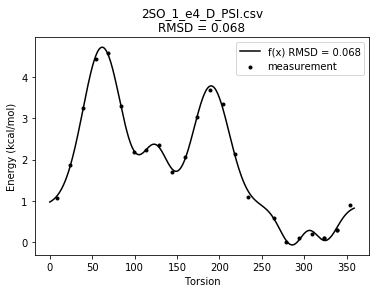

[,3.07281997e+01,,3.05069839e+02,,5.56118456e+02,-3.13254343e+01
,,3.05020935e+02,,5.87568251e+02,,2.90366489e+00,,1.90279384e+02
,,9.12729207e+02,,1.37950750e+00,,1.24476477e+02,,4.71631446e+02
,,3.83875160e+00,,6.17610154e+01,,1.02668981e+03,-9.78004781e+01
,,1.34767606e+03,,9.55357382e+03,,8.81078580e-01]


In [172]:
data = "2SO_1_e4_D_PSI.csv"
guess = [0.654688550927, 301.68094713470998, 100, -1.1123481165204663, 300.8104667718961, 2895.577967031349, 2.6609678706599507, 190.95363792143806, 874.8416368587814, 1.2393207222083953, 122.51427821671327, 443.2669543586576, 3.6794964182459013, 63.451207182085945, 741.0176010944612, -97.80047812375938, 1347.6760596440222, 9553.573822154925, 1.1191767847075162]
six_optimised_values, rmsd = fit_the_curve(data, guess)

a = 4.472924418242684
b = 56.66597209530603
c = 2737.687956992864
d = 4.694433259924945
f = 175.2710461447681
g = 2082.2095835768278
h = 1.049802286178416
i = 297.24882420795825
j = 741.2350151669033
k = -1.1569026372344182
l = 227.75675417392316
m = 545.8220053002465
n = 1.6894155295178586
o = 69.05789739354589
p = 344.6736714858593
q = 1.289526188306361
r = 353.55685374504486
s = 21.17088954165599
t = 0.15630943815038315


/Volumes/Eric/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.



RMSD = 0.03302594571362027



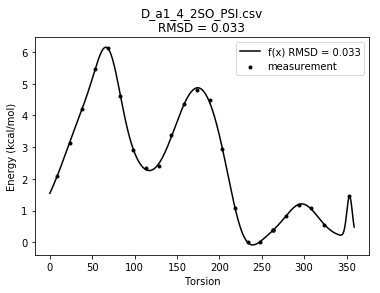

[,4.47292442e+00,,5.66659721e+01,,2.73768796e+03,,4.69443326e+00
,,1.75271046e+02,,2.08220958e+03,,1.04980229e+00,,2.97248824e+02
,,7.41235015e+02,-1.15690264e+00,,2.27756754e+02,,5.45822005e+02
,,1.68941553e+00,,6.90578974e+01,,3.44673671e+02,,1.28952619e+00
,,3.53556854e+02,,2.11708895e+01,,1.56309438e-01]


In [173]:
data = "D_a1_4_2SO_PSI.csv"
guess = [6.9, 68, 1240, 5.1, 173, 1960, 1.2, 297, 900, -0.6, 240, 200, -0.9, 74, 100, 1., 353, 26, 0.0]
six_optimised_values, rmsd = fit_the_curve(data, guess)

a = 4.084678770950021
b = 287.49272121920757
c = 1117.2378994706658
d = 5.13509529760906
f = 237.28328067712505
g = 695.586052649786
h = 5.937897482383101
i = 179.6310071216669
j = 1334.4256365818044
k = 1.097937037360281
l = 105.03724561345052
m = 105.68904881738645
n = 0.5755301240875944
o = 56.47985475809614
p = 275.2291335901614
q = -6751.900976477587
r = -1885625.8944173588
s = 16204815.172010602
t = 0.027924209586254446

RMSD = 0.07657585379116906



/Volumes/Eric/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Volumes/Eric/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in square


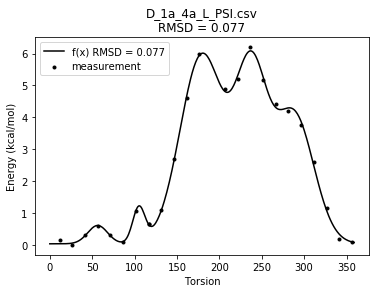

[,4.08467877e+00,,2.87492721e+02,,1.11723790e+03,,5.13509530e+00
,,2.37283281e+02,,6.95586053e+02,,5.93789748e+00,,1.79631007e+02
,,1.33442564e+03,,1.09793704e+00,,1.05037246e+02,,1.05689049e+02
,,5.75530124e-01,,5.64798548e+01,,2.75229134e+02,-6.75190098e+03
,-1.88562589e+06,,1.62048152e+07,,2.79242096e-02]


In [174]:
data = "D_1a_4a_L_PSI.csv"
guess = [4, 290, 1000, 5.8, 237, 830, 6.1, 177, 1220, 1.2, 103, 100, 0.6, 56, 430, 0.2, 12, 60, 0]
six_optimised_values, rmsd = fit_the_curve(data, guess)

a = 4.651864984529593
b = 61.49995701637913
c = 1264.4670980699834
d = 2.0934194291613317
f = 124.00459497713689
g = 492.7683356789921
h = 3.8153796529087414
i = 188.50462521143615
j = 1430.164049708771
k = 0.5042607359689013
l = 250.64329161251067
m = 195.78844132874147
n = 1.9407085924590024
o = 305.08668758962807
p = 23.332822161377457
q = 2.069346227071753
r = 351.02300060020536
s = 26.5563357725992
t = 0.024222740136816162


/Volumes/Eric/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Volumes/Eric/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in square



RMSD = 0.018852538442059193



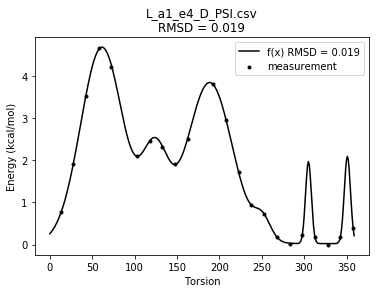

[4.65186498e+00,6.14999570e+01,1.26446710e+03,2.09341943e+00
,1.24004595e+02,4.92768336e+02,3.81537965e+00,1.88504625e+02
,1.43016405e+03,5.04260736e-01,2.50643292e+02,1.95788441e+02
,1.94070859e+00,3.05086688e+02,2.33328222e+01,2.06934623e+00
,3.51023001e+02,2.65563358e+01,2.42227401e-02]


In [175]:
data = "L_a1_e4_D_PSI.csv"
guess = [8.21589119e+00,8.16138978e+01,5.24344310e+03,6.11505428e+00
,1.58007895e+02,1.06513634e+03,3.45490210e+00,1.87407672e+02
,5.23076003e+02,1.31776770e+00,2.79310862e+02,2.52316352e+02
,1.92726134e+00,3.06873254e+02,4.74454835e+02,3.36470000e+00
,3.50952179e+02,9.89880088e+02,-2.55128570e-02]
six_optimised_values, rmsd = fit_the_curve(data, guess)


a = 8.215895027107655
b = 81.613908192333
c = 5243.44896487525
d = 6.115028824621163
f = 158.0077823514335
g = 1065.1331449058644
h = 3.454932923876812
i = 187.40758354483438
j = 523.0811265995966
k = 1.3217606947060434
l = 279.3337287406615
m = 252.59851339757927
n = 1.9582726999972566
o = 307.0367042375846
p = 475.15147242922075
q = 3.351879349145035
r = 350.59726412716225
s = 943.6015537102605
t = -0.025516702194151704

RMSD = 0.14082553422064054



/Volumes/Eric/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


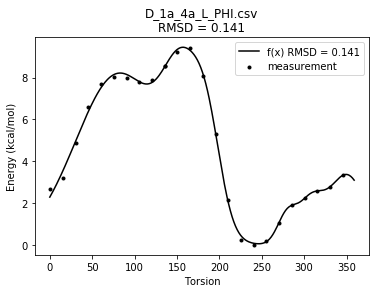

[,8.21589503e+00,,8.16139082e+01,,5.24344896e+03,,6.11502882e+00
,,1.58007782e+02,,1.06513314e+03,,3.45493292e+00,,1.87407584e+02
,,5.23081127e+02,,1.32176069e+00,,2.79333729e+02,,2.52598513e+02
,,1.95827270e+00,,3.07036704e+02,,4.75151472e+02,,3.35187935e+00
,,3.50597264e+02,,9.43601554e+02,-2.55167022e-02]


In [176]:
data = "D_1a_4a_L_PHI.csv"
guess = [8.21589119e+00,8.16138978e+01,5.24344310e+03,6.11505428e+00
,1.58007895e+02,1.06513634e+03,3.45490210e+00,1.87407672e+02
,5.23076003e+02,1.31776770e+00,2.79310862e+02,2.52316352e+02
,1.92726134e+00,3.06873254e+02,4.74454835e+02,3.36470000e+00
,3.50952179e+02,9.89880088e+02,-2.55128570e-02]
six_optimised_values, rmsd = fit_the_curve(data, guess)

a = 4.084678770950021
b = 287.49272121920757
c = 1117.2378994706658
d = 5.13509529760906
f = 237.28328067712505
g = 695.586052649786
h = 5.937897482383101
i = 179.6310071216669
j = 1334.4256365818044
k = 1.097937037360281
l = 105.03724561345052
m = 105.68904881738645
n = 0.5755301240875944
o = 56.47985475809614
p = 275.2291335901614
q = -6751.900976477587
r = -1885625.8944173588
s = 16204815.172010602
t = 0.027924209586254446

RMSD = 0.07657585379116906



/Volumes/Eric/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Volumes/Eric/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in square


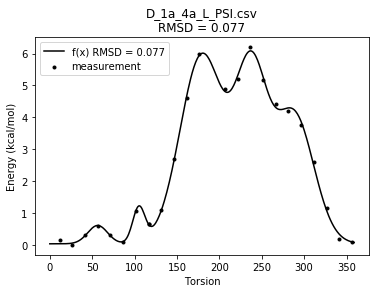

[,4.08467877e+00,,2.87492721e+02,,1.11723790e+03,,5.13509530e+00
,,2.37283281e+02,,6.95586053e+02,,5.93789748e+00,,1.79631007e+02
,,1.33442564e+03,,1.09793704e+00,,1.05037246e+02,,1.05689049e+02
,,5.75530124e-01,,5.64798548e+01,,2.75229134e+02,-6.75190098e+03
,-1.88562589e+06,,1.62048152e+07,,2.79242096e-02]


In [177]:
data = "D_1a_4a_L_PSI.csv"
guess = [4, 290, 1000, 5.8, 237, 830, 6.1, 177, 1220, 1.2, 103, 100, 0.6, 56, 430, 0.2, 12, 60, 0]
six_optimised_values, rmsd = fit_the_curve(data, guess)